In [21]:
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
import math
plt.set_cmap('grey');

<Figure size 640x480 with 0 Axes>

### Task 1.a

In [22]:
def task_1_a():
    print("Task 1 (a) ...")
    img = cv.imread('../images/shapes.png', cv.IMREAD_GRAYSCALE)

    t1, t2 = 50, 200
    edges = cv.Canny(img, t1, t2)
    coord_lines = cv.HoughLines(edges, 0.8, 2*np.pi / 180, t1)

    img_copy = img.copy()
    img_copy = cv.cvtColor(img_copy, cv.COLOR_GRAY2BGR)

    for line_point in coord_lines:
        ro = line_point[0][0]
        theta = line_point[0][1]

        x = round(ro*math.cos(theta))
        y = round(ro*math.sin(theta))
        
        cos_phi = math.cos(theta)
        sin_phi = math.sin(theta)

        # Inspired on openCV documentation: https://docs.opencv.org/4.x/d9/db0/tutorial_hough_lines.html
        pt1 = (int(x + 1000*(-sin_phi)), int(y + 1000*(cos_phi)))
        pt2 = (int(x - 1000*(-sin_phi)), int(y - 1000*(cos_phi)))

        cv.line(img_copy, pt1, pt2, (255, 0, 0), 1, cv.LINE_AA)

    return img_copy

Task 1 (a) ...


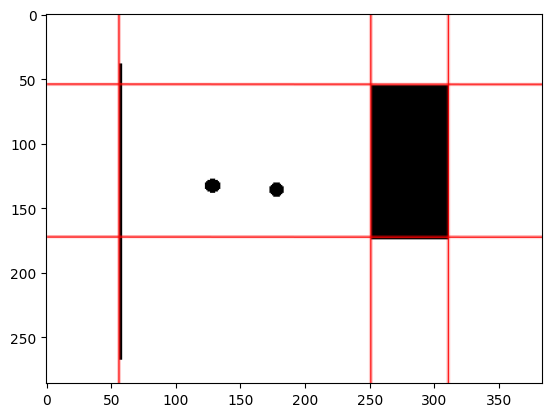

In [23]:
plt.imshow(task_1_a());

### Task 1.b

In [24]:
def myHoughLines(img_edges, d_resolution, theta_step_sz, threshold):
    """
    Your implementation of HoughLines
    :param img_edges: single-channel binary source image (e.g: edges)
    :param d_resolution: the resolution for the distance parameter
    :param theta_step_sz: the resolution for the angle parameter
    :param threshold: minimum number of votes to consider a detection
    :return: list of detected lines as (d, theta) pairs and the accumulator
    """
    accumulator = np.zeros((round(180 / theta_step_sz), round(np.linalg.norm(img_edges.shape) / d_resolution)*2+1), dtype=np.int16)
    detected_lines = []
    
    # To avoid case where d is negative we used hints from 
    # Basic Hough Transform Algorithm by Udacity (accses only via link)
    # https://www.youtube.com/watch?v=2oGYGXJfjzw
    dmax = round(np.linalg.norm(img_edges.shape) / d_resolution)
    ds = np.arange(-dmax, dmax+1, 1)

    for y in range(img_edges.shape[0]):
        for x in range(img_edges.shape[1]):
            if img_edges[y][x] != 0:                
                theta = 0
                while theta < round(180/theta_step_sz):
                    theta_r = theta * np.pi / 180
                    d = round(x*np.cos(theta_r) + y*np.sin(theta_r))
                    accumulator[theta, np.argmin(np.abs(ds - d))] += 1
                    theta += 1
                    
    for theta in range(accumulator.shape[0]):
        for d in range(accumulator.shape[1]):
            if accumulator[theta][d] >= threshold:
                detected_lines.append((abs(ds[d]), theta * np.pi / 180))


    return np.array(detected_lines), accumulator

In [25]:
def task_1_b():
    print("Task 1 (b) ...")
    img = cv.imread('../images/shapes.png')
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert the image into grayscale
    t1, t2 = 59, 200
    edges = cv.Canny(img_gray, t1, t2) # detect the edges
    d_resolution, theta_sep_sz = 0.5, 1.5

    detected_lines, accumulator = myHoughLines(edges, d_resolution, theta_sep_sz, t1)
    
    img_copy = img.copy()
    for line_point in detected_lines:
        ro = line_point[0]
        theta = line_point[1]

        cos_phi = math.cos(theta)
        sin_phi = math.sin(theta)
        x = round(ro*cos_phi)
        y = round(ro*sin_phi)

        # Inspired on openCV documentation: https://docs.opencv.org/4.x/d9/db0/tutorial_hough_lines.html
        pt1 = (int(x + 1000*(-sin_phi)), int(y + 1000*(cos_phi)))
        pt2 = (int(x - 1000*(-sin_phi)), int(y - 1000*(cos_phi)))

        cv.line(img_copy, pt1, pt2, (255, 0, 0), 1, cv.LINE_AA)

    return img_copy

In [26]:
out = task_1_b()

Task 1 (b) ...


In [27]:
img = cv.imread('../images/shapes.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert the image into grayscale
t1, t2 = 59, 200
edges = cv.Canny(img_gray, t1, t2) # detect the edges
d_resolution, theta_sep_sz = 2, 0.5


detected_lines, accumulator = myHoughLines(edges, d_resolution, theta_sep_sz, t1)

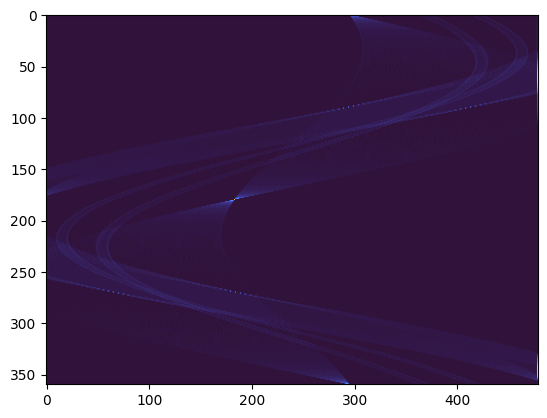

In [28]:
plt.imshow(accumulator, cmap='turbo')

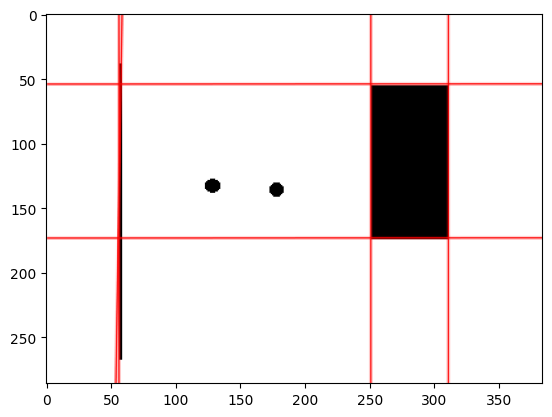

In [ ]:
plt.imshow(out);

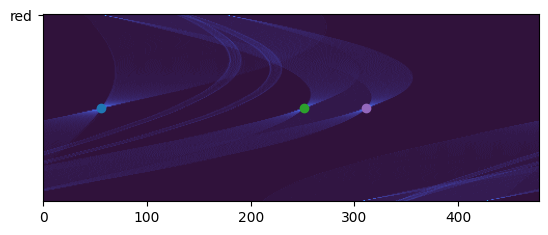

In [ ]:
plt.imshow(H, cmap='turbo')
for x, y in det_edg:
    plt.plot(x, y, 'o', 'red')

### Task 3

In [30]:
def myKmeans(data, k):
    """
    Your implementation of k-means algorithm
    :param data: list of data points to cluster
    :param k: number of clusters
    :return: centers and list of indices that store the cluster index for each data point
    """
    centers = np.zeros((k, data.shape[1]), np.float16)
    index = np.zeros(data.shape[0], dtype=int)

    # initialize centers using some random points from data
    for ind in range(len(centers)):
        rand_point_ind = np.random.randint(0, data.shape[0])
        centers[ind] = data[rand_point_ind].copy()
    
    convergence = False
    iterationNo = 0

    while not convergence:
        # assign each point to the cluster of closest center
        for i in range(len(index)):
            index[i] = np.argmin(np.linalg.norm(np.abs(centers - data[i]), axis=1))

        # update clusters' centers and check for convergence
        not_updated_centers = np.zeros(k, dtype=bool)
        for i in range(k):
            indeces_center_i = index==i
            new_center = data[indeces_center_i].copy().mean(axis=0)
            
            if np.abs(new_center-centers[i]).mean() > 1e-1:
                centers[i] = new_center.copy()
            else:
                not_updated_centers[i] = True

        if not_updated_centers.any():
            convergence = True
            
        iterationNo += 1
        print('iterationNo = ', iterationNo)

    return index, centers

In [116]:
def task_3_a(k=5):
    print("Task 3 (a) ...")
    img = cv.imread('../images/flower.png')
    data = cv.cvtColor(img, cv.COLOR_BGR2GRAY).reshape((-1, 1))


    ind, clusts = myKmeans(data, k)
    return ind.reshape(img.shape[:2])

In [32]:
task_3_a()

Task 3 (a) ...
iterationNo =  1
iterationNo =  2
iterationNo =  3
iterationNo =  4
iterationNo =  5


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [3, 3, 1, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0]])

In [115]:
def task_3_b(k=5):
    print("Task 3 (b) ...")
    img = cv.imread('../images/flower.png')
    
    data = img.copy().reshape(-1, 3)

    ind, clusts = myKmeans(data, k)

    return ind.reshape(img.shape[:2])

In [114]:
def task_3_c(k=5):
    print("Task 3 (c) ...")
    img = cv.imread('../images/flower.png')
    img_grey = cv.cvtColor(img , cv.COLOR_BGR2GRAY)

    intensity_data = img_grey.reshape((-1,1))

    # Source: documentation
    # https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html
    pos_data = np.argwhere(img_grey) / (np.array(img_grey.shape) * 5)

    # Source: documentation
    # https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
    data = np.hstack((intensity_data, pos_data))

    ind, clusts = myKmeans(data, k)

    return ind.reshape(img.shape[:2])

In [35]:
def get_derivative_of_gaussian_kernel(size, sigma):
    ker_x = cv.getGaussianKernel(size, sigma)
    ker_y = cv.getGaussianKernel(size, sigma).transpose()

    ker_gauss = ker_x @ ker_y
    gradient = np.gradient(ker_gauss)

    return gradient

In [113]:
def task_3_d(k=5):
    print("Task 3 (d) ...")
    img = cv.imread('../images/flower.png')
    img_grey = cv.cvtColor(img , cv.COLOR_BGR2GRAY)

    color_data = img.reshape((-1,3))

    # Source: documentation
    # https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html
    pos_data = np.argwhere(img_grey) / (np.array(img_grey.shape) * 10)

    kernel_x, kernel_y = get_derivative_of_gaussian_kernel(7, 2)

    edges_x = cv.filter2D(img_grey, -1, kernel_x)  
    edges_y = cv.filter2D(img_grey, -1, kernel_y) 

    magnitude = np.sqrt(np.square(edges_x) + np.square(edges_y)).reshape((-1, 1))

    # Source: documentation
    # https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
    data = np.hstack((color_data, pos_data, magnitude))

    ind, clusts = myKmeans(data, k)
    return ind.reshape(img.shape[:2])

In [118]:
resA5, resB5, resC5, resD5 = task_3_a(), task_3_b(), task_3_c(), task_3_d()
resA10, resB10, resC10, resD10 = task_3_a(10), task_3_b(10), task_3_c(10), task_3_d(10)

Task 3 (a) ...
iterationNo =  1
Task 3 (b) ...


d:\OneDrive\Рабочий стол\Computer Vision\cv_venv\lib\site-packages\numpy\linalg\linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


iterationNo =  1
iterationNo =  2
iterationNo =  3
iterationNo =  4
iterationNo =  5
Task 3 (c) ...
iterationNo =  1
iterationNo =  2
iterationNo =  3
iterationNo =  4
iterationNo =  5
Task 3 (d) ...
iterationNo =  1
iterationNo =  2
iterationNo =  3
iterationNo =  4
iterationNo =  5
iterationNo =  6
iterationNo =  7
Task 3 (a) ...
iterationNo =  1
Task 3 (b) ...
iterationNo =  1
iterationNo =  2
iterationNo =  3
iterationNo =  4
iterationNo =  5
Task 3 (c) ...
iterationNo =  1
iterationNo =  2
Task 3 (d) ...
iterationNo =  1
iterationNo =  2
iterationNo =  3
iterationNo =  4
iterationNo =  5
iterationNo =  6
iterationNo =  7


In [62]:
img = cv.imread('../images/flower.png')


In [96]:
def color_per_cluster(img, clusters):
    result = []
    for i in range(np.max(clusters)+1):
        mask = clusters == i
        colors = img[mask]
        result.append(list(map(int, np.mean(colors, axis=0))))
    return result

def change_cluster_to_color(cluster, colors):
    cluster = cluster.tolist()
    for i in range(len(cluster)):
        for j in range(len(cluster[0])):
            cluster[i][j] = colors[cluster[i][j]]
    return np.array(cluster)

In [119]:
cluster_colorsA5 = color_per_cluster(img, resA5)
colored_clusterA5 = change_cluster_to_color(resA5, cluster_colorsA5)

cluster_colorsB5 = color_per_cluster(img, resB5)
colored_clusterB5 = change_cluster_to_color(resB5, cluster_colorsB5)

cluster_colorsC5 = color_per_cluster(img, resC5)
colored_clusterC5 = change_cluster_to_color(resC5, cluster_colorsC5)

cluster_colorsD5 = color_per_cluster(img, resD5)
colored_clusterD5 = change_cluster_to_color(resD5, cluster_colorsD5)

cluster_colorsA10 = color_per_cluster(img, resA10)
colored_clusterA10 = change_cluster_to_color(resA10, cluster_colorsA10)

cluster_colorsB10 = color_per_cluster(img, resB10)
colored_clusterB10 = change_cluster_to_color(resB10, cluster_colorsB10)

cluster_colorsC10 = color_per_cluster(img, resC10)
colored_clusterC10 = change_cluster_to_color(resC10, cluster_colorsC10)

cluster_colorsD10 = color_per_cluster(img, resD10)
colored_clusterD10 = change_cluster_to_color(resD10, cluster_colorsD10)



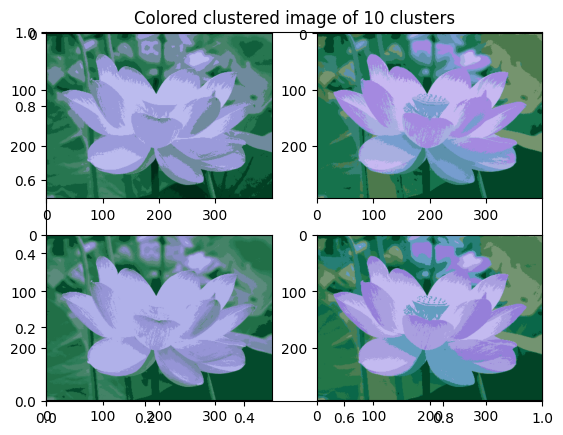

In [126]:
plt.title("Colored clustered image of 10 clusters via 10-Means")
plt.subplot(221)
plt.imshow(colored_clusterA10)
plt.subplot(222)
plt.imshow(colored_clusterB10)
plt.subplot(223)
plt.imshow(colored_clusterC10)
plt.subplot(224)
plt.imshow(colored_clusterD10);

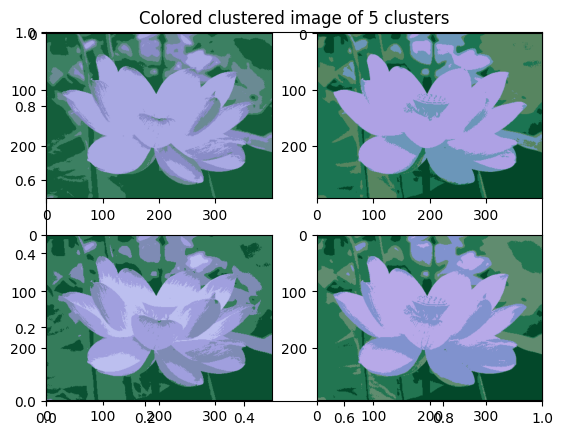

In [125]:
plt.title("Colored clustered image of 5 clusters")
plt.subplot(221)
plt.imshow(colored_clusterA5)
plt.subplot(222)
plt.imshow(colored_clusterB5)
plt.subplot(223)
plt.imshow(colored_clusterC5)
plt.subplot(224)
plt.imshow(colored_clusterD5);

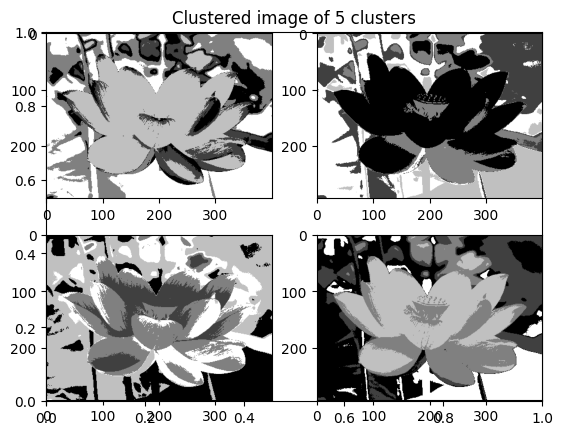

In [127]:
plt.title("Clustered image of 5 clusters")
plt.subplot(221)
plt.imshow(resA5)
plt.subplot(222)
plt.imshow(resB5)
plt.subplot(223)
plt.imshow(resC5)
plt.subplot(224)
plt.imshow(resD5);

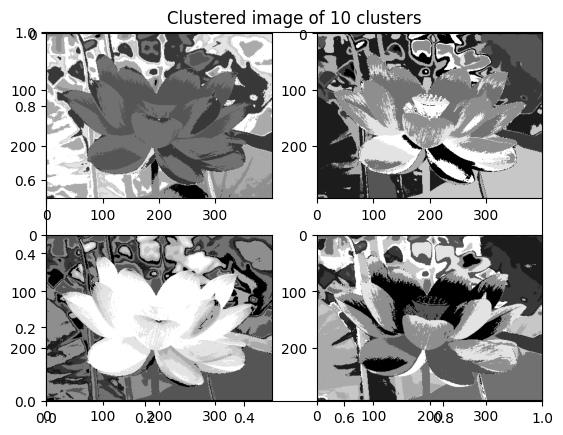

In [128]:
plt.title("Clustered image of 10 clusters")
plt.subplot(221)
plt.imshow(resA10)
plt.subplot(222)
plt.imshow(resB10)
plt.subplot(223)
plt.imshow(resC10)
plt.subplot(224)
plt.imshow(resD10);

### Task 4

In [ ]:
def meanShift(data, window_size, kernel, x1, y1):
    """
    Your implementation of mean shift algorithm
    :param data: data points to cluster
    :param window_size: the size of the window is 2 * window_size + 1 
    :param kernel: the chosen kernel (slide 74)
    :param x1, y1: original position (x1, y1)
    :return: shifted position (x2, y2) and sum of weights within the window
    """
    x2 = x1
    y2 = x2
    sum_w = None
    '''
    ...
    your code ...
    ...
    '''
    return x2, y2, sum_w

[-9.76 -4.28] -1.9199999999999995


(array([[4, 1],
        [4, 2],
        [6, 1],
        [6, 3]]),
 <matplotlib.patches.Circle at 0x1c52892bf70>)

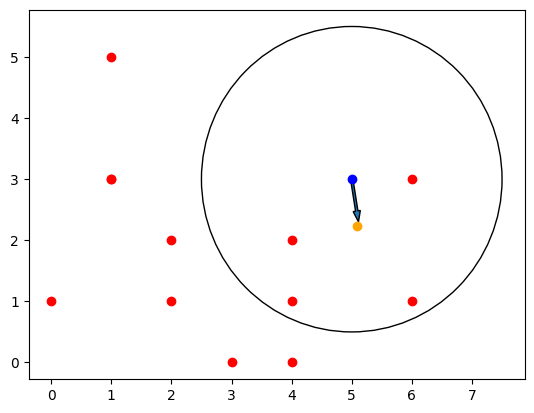

In [ ]:
# a = np.random.random_integers(0, 5, 20).reshape(-1, 2)
a = np.array([
    [4, 1],
    [4, 2],
    [4, 0],
    [2, 2],
    [1, 5],
    [3, 0],
    [1, 3],
    [1, 3],
    [2, 1],
    [0, 1],
    [6, 1],
    [6, 3],
])
x1, y1 = 5, 3
window_size = 2.5
center = np.array([x1, y1])

def pts(data, x1, y1, window_size):
    x1, y1 = 5, 2
    shifted_points = data-np.array([x1, y1])
    window_size = 2
    d_pnts2cntr = np.linalg.norm(shifted_points, axis=1)

    points_in_window_indeces = np.where(d_pnts2cntr<window_size)
    points_in_window = data[points_in_window_indeces]

    return points_in_window_indeces, points_in_window

points_in_window_indeces, pts = pts(a, x1, y1, window_size)

def K(x):
    norm_x = np.linalg.norm(x)
    if norm_x <= 1:
        return 1 - norm_x**2
    else:
        0

g = lambda x: -K(x)
new_center = center.copy()

sum_numerator = 0.
sum_denumirator = 0.
for i in range(pts.shape[0]):
    value = g((center-pts[i])/window_size)
    sum_numerator += pts[i]*value
    sum_denumirator += value
print(sum_numerator, sum_denumirator)

new_center = sum_numerator / sum_denumirator
        

# shifted_points, d_pnts2cntr, points_in_window
circl = plt.Circle((x1, y1), window_size, fill=False)
ax = plt.gca()
ax.cla()
ax.plot(a.transpose()[0], a.transpose()[1], 'o', color='red')
ax.plot(x1, y1, 'o', color='blue')
ax.plot(*new_center, 'o', color='orange')
ax.arrow(*center, *(new_center-center+np.array([-0., 0.25])), width=0.04)

pts, ax.add_patch(circl)

In [ ]:
a = np.arange(0, 10).reshape(-1, 2)
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
img = cv.imread('../images/flower.png')
img_LUV = cv.cvtColor(img , cv.COLOR_BGR2LUV)
data = img_LUV.reshape(-1, 3)






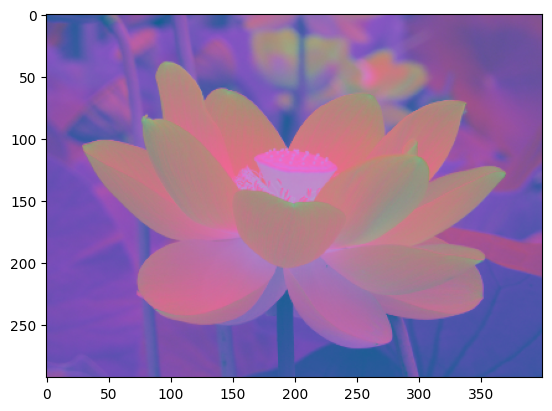

In [ ]:
plt.imshow(img_grey)